In [238]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [239]:
df=pd.read_csv(r"C:/Users/nirma/Desktop/shivani/wines_SPA.csv")

In [240]:
df.describe

<bound method NDFrame.describe of                     winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  acidity  

In [241]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [242]:
df.shape

(7500, 11)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [244]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [245]:
cat_cols=[]
num_cols=[]

In [246]:
for x in df.columns:
    if df[x].dtypes=='object':
        print(cat_cols.append(x))
    else:
        print(num_cols.append(x))

None
None
None
None
None
None
None
None
None
None
None


In [247]:
cat_cols

['winery', 'wine', 'year', 'country', 'region', 'type']

In [248]:
categ=['winery', 'wine', 'year', 'country', 'region', 'type']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [249]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,61,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,66,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,57,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,47,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,44,4.8,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,64,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,66,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,65,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,59,4.2,389,0,57,64.50,11,5.0,3.0


In [250]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [251]:
pip install tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [252]:
df.corr()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
winery,1.000000,-0.153903,-0.158022,-0.021444,-0.002348,NaN,0.059815,0.015442,-0.122144,0.090908,0.252386
wine,-0.153903,1.000000,-0.052336,0.032743,0.085429,NaN,0.163048,0.054004,0.161590,-0.022976,-0.173308
year,-0.158022,-0.052336,1.000000,-0.291572,0.026191,NaN,-0.178977,-0.393030,0.172060,-0.109771,0.119606
rating,-0.021444,0.032743,-0.291572,1.000000,0.015229,NaN,0.044441,0.544809,-0.026705,0.163033,-0.094553
num_reviews,-0.002348,0.085429,0.026191,0.015229,1.000000,NaN,0.048799,-0.030083,-0.001946,0.067106,0.040138
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.059815,0.163048,-0.178977,0.044441,0.048799,NaN,1.000000,0.080637,0.271435,0.334969,-0.161361
price,0.015442,0.054004,-0.393030,0.544809,-0.030083,NaN,0.080637,1.000000,-0.024484,0.153624,-0.032870
type,-0.122144,0.161590,0.172060,-0.026705,-0.001946,NaN,0.271435,-0.024484,1.000000,0.396738,-0.282808
body,0.090908,-0.022976,-0.109771,0.163033,0.067106,NaN,0.334969,0.153624,0.396738,1.000000,-0.017950


In [253]:
import seaborn as sns

<Axes: >

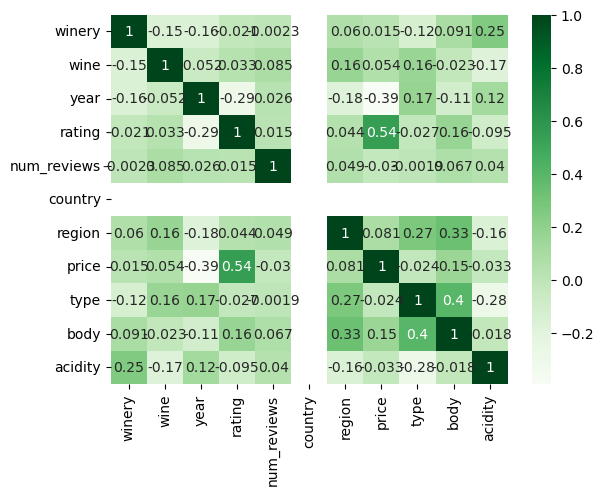

In [254]:
sns.heatmap(df.corr(),annot = True,cmap='Greens')

In [255]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1,random_state=42)

In [256]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [257]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [258]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Users\nirma\anaconda3\jupyter notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [259]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [260]:
history = model.fit(X_train, y_train, epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16428.0273 - val_loss: 14837.3770
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18727.1777 - val_loss: 14739.1436
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17625.2969 - val_loss: 14576.3105
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17110.4961 - val_loss: 14275.4502
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17362.3535 - val_loss: 13767.4971
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17768.1445 - val_loss: 12985.2646
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16230.5293 - val_loss: 11890.8584
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14700.0508 - val_loss: 10383.5332
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12011.2178 - val_loss: 8644.2363
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10479.2109 - val_loss: 6900.1865
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7671.3486 -

In [261]:
test_loss=model.evaluate(X_test,y_test,verbose=0)
print(f"Test Loss (MSE):{test_loss}")
y_pred =model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Mean Squared Error (MSE):{mse}')
print(f'Mean Absolute Error (MAE):{mae}')
print(f'Root Mean Squared Error (RMSE):{rmse}')
print(f'R2 Score:{r2}')
print('The Model is Good')

Test Loss (MSE):20.709518432617188
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error (MSE):20.709516098106768
Mean Absolute Error (MAE):3.314226581603778
Root Mean Squared Error (RMSE):4.550770934479868
R2 Score:0.9987724878288864
The Model is Good
